In [3]:
library(tidyverse)
library(babynames)
library(stringr)
library(nycflights13)

── Attaching packages ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0     ✔ purrr   1.0.0
✔ tibble  3.1.8     ✔ dplyr   1.1.0
✔ tidyr   1.2.1     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


# Lecture 12: Strings and text data

<div style="border: 1px double black; padding: 10px; margin: 10px">

**After today's lecture you will:**
* Understand the basics of working with strings in R.
* Convert data to strings.
* Extract data from strings.
</div>

These notes correspond to Chapter 15 of your book.


## Strings in R
We have already encountered strings at many points in the class, but we didn't really discuss the details of how they work. 

In R, strings must be quoted:

In [4]:
my_string <- "MLE stands for Maximum Likelihood Estimate"
my_string

[1] "MLE stands for Maximum Likelihood Estimate"

Now what if I want `my_string` to contain a quotation?
```
> my_string <- ""MLE" stands for "Maximum Likelihood Estimate""
Error in parse(text = x, srcfile = src): <text>:1:16: unexpected symbol
1: mystring3 <- ""MLE
                   ^
Traceback:
```

To create a string containing double quotes, while using double quotes to create it, you must *escape* the quotes using a backslash (`\`):

In [52]:
my_string <- "\"MLE\" stands for \"Maximum Likelihood Estimate\""
my_string 

[1] "\"MLE\" stands for \"Maximum Likelihood Estimate\""

What if you actually want a backslash? Then you need to escape it as well:

In [54]:
"\\ is the backslash character"

[1] "\\ is the backslash character"

The printed representation of strings shows the escapes:

In [6]:
print("\"MLE\" stands for \"Maximum Likelihood Estimate\"")

[1] "\"MLE\" stands for \"Maximum Likelihood Estimate\""


Use `str_view()` to see the raw contents of the string. 

In [8]:
str_view(my_string)

[1] │ MLE stands for Maximum Likelihood Estimate

## Special characters

When used inside a string, `\"`, `\'`, and `\\`, are "special characters". Some other special characters you will encounter:

- `\n` (new line), 
- `\t`, tab. 
- `\u` or `\U`: Unicode.

### ASCII and unicode
Early computers could only read and write the ASCII character set, essentially just roman letters, numbers and some punctuation.

Nowadays, computers need to be able to understand alphabets from all over the world. For this we have *Unicode*.

You can print characters if you know their unicode using `\u`. For example, the copyright character has unicode `00A9`. Wikipedia has [a complete list](https://en.wikipedia.org/wiki/List_of_Unicode_characters).

In [11]:
print("\u00A9")

[1] "©"


## String functions in R

Through the `stringr` package, `tidyverse` has a lot of useful functions for combining strings.

### Combining strings
Combining two strings into one is called "concatenation" by computer scientists and "combining strings" by everyone else. `concatenate` is hard to type, so it is abbreviated `str_c`:

In [12]:
c("a", "b", "c") %>% print  # notice the difference!
str_c("a", "b", "c") 
# "Let us con", 
#       " / ", 
#       "catenate strings!") %>% print

[1] "a" "b" "c"


[1] "abc"

Another use of `str_c` is to combine multiple strings into one with a separator:

In [22]:
str_c("one", "two", "ten", sep = ", ") # can provide a separator

[1] "one, two, ten"

If you already know some R, you might recognize this as being equivalent to 
```{r} 
paste("one", "two", "ten", sep=", ")
```

### Flattening strings
`str_flatten` will take a vector of strings and flatten them into one string.

In [21]:
# list all the air carriers flying out of each airport
distinct(flights, origin, carrier) %>% group_by(origin) %>% summarize(carrier = str_flatten(carrier, ", "))

origin,carrier
<chr>,<chr>
EWR,"UA, B6, AA, MQ, DL, US, EV, AS, WN, 9E, VX, OO"
JFK,"AA, B6, UA, DL, US, VX, MQ, 9E, HA, EV"
LGA,"UA, DL, EV, AA, B6, MQ, WN, FL, US, F9, 9E, YV, OO"


### Extracting pieces of a string
Sometimes we want only a portion of a string, say the first few or last characters. The `str_sub(str, start, stop)` function will extract substrings from a larger string. (Negative indexing will counts from the end.)

In [36]:
str_sub('spring break!', 1, 2)  # first two characters
str_sub('was fun', -2, -1)  # last two characters
str_sub('but now', 3, 5)  # middle characters
str_sub('it\'s done', 2, -2) # everything except the first and last

[1] "sp"

[1] "un"

[1] "t n"

[1] "t's don"

## Extracting data from strings
Often in real data we have multiple columns of data crammed into one column. In fact, we saw this last lecture when looking at IMDB data:

In [21]:
library(rvest)
imdb.250 <- read_html("https://www.imdb.com/chart/top/") %>% html_element('table') %>% html_table() %>% select(2:4)
head(imdb.250)

Rank & Title,IMDb Rating,Your Rating
<chr>,<dbl>,<chr>
1. The Shawshank Redemption (1994),9.2,12345678910 NOT YET RELEASED Seen
2. The Godfather (1972),9.2,12345678910 NOT YET RELEASED Seen
3. The Dark Knight (2008),9.0,12345678910 NOT YET RELEASED Seen
4. The Godfather Part II (1974),9.0,12345678910 NOT YET RELEASED Seen
5. 12 Angry Men (1957),9.0,12345678910 NOT YET RELEASED Seen
6. Schindler's List (1993),8.9,12345678910 NOT YET RELEASED Seen


The `Rank & Title` column contains three pieces of data: rank, title, and year of release.

## `separate_` functions
`tidyverse` has some built-in functions designed to break apart and combine string data:
- `separate_longer_delim`, `separate_longer_position`: combine multiple columns of string data into one.
- `separate_wider_delim`, `separate_wider_position`: extract string data into multiple columns.
These functions work analogously to `pivot_{wider,longer}`.


`separate_wider_delim` converts a delimited string into multiple columns of data. `separate_wider_position` does the same, but uses a fixed position.

In [13]:
df3 <- tibble(x = c("a10.1.2022", "b10.2.2011", "e15.1.2015"))
df3 %>%  separate_wider_delim(
    x,
    delim = ".",
    names = c("code", "edition", "year")
  )


code,edition,year
<chr>,<chr>,<chr>
a10,1,2022
b10,2,2011
e15,1,2015


In [23]:
# easily separate the string data in imdb.250

## Harry Potter
Let's practice some string analysis by looking at the text of Harry Potter:
![harry potter](https://images-na.ssl-images-amazon.com/images/I/51HSkTKlauL._SX346_BO1,204,203,200_.jpg)

In [26]:
# remotes::install_github("bradleyboehmke/harrypotter")
library(harrypotter)
str(philosophers_stone)
ch1 <- philosophers_stone[17]

 chr [1:17] "THE BOY WHO LIVED　　Mr. and Mrs. Dursley, of number four, Privet Drive, were proud to say that they were perfe"| __truncated__ ...


`philosophers_stone` is a list containing seventeen entries: one for each chapter of "Harry Potter and the Sorcerer's Stone" (titled differently in the U.K.)

Instead of reading Harry Potter, we will analyze it like a data set.

Each entry of `philosophers_stone` is a *string*. There is one string per chapter, so they are pretty long. To figure out how long a string is, we can use the `str_length()` command:

In [45]:
ch1 <- philosophers_stone[[1]]
# length(philosophers_stone)
ch1 %>% print

[1] "THE BOY WHO LIVED　　Mr. and Mrs. Dursley, of number four, Privet Drive, were proud to say that they were perfectly normal, thank you very much. They were the last people you'd expect to be involved in anything strange or mysterious, because they just didn't hold with such nonsense.　　Mr. Dursley was the director of a firm called Grunnings, which made drills. He was a big, beefy man with hardly any neck, although he did have a very large mustache. Mrs. Dursley was thin and blonde and had nearly twice the usual amount of neck, which came in very useful as she spent so much of her time craning over garden fences, spying on the neighbors. The Dursleys had a small son called Dudley and in their opinion there was no finer boy anywhere.　　The Dursleys had everything they wanted, but they also had a secret, and their greatest fear was that somebody would discover it. They didn't think they could bear it if anyone found out about the Potters. Mrs. Potter was Mrs. Dursley's sister, but they ha

### Exercise
What is the longest (in number of characters) chapter in Philosopher's Stone?

In [27]:
# longest chapter in harry potter

Now say we wanted to find the chapter with the most words. Is it necessarily the same?

If you scroll through `ch1` a bit, you'll notice that there are some funny characters which don't appear in the books:
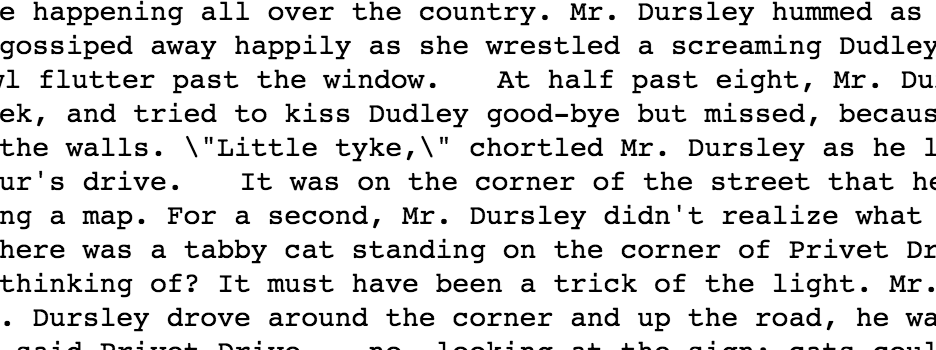

Let's see how this works for Harry Potter. Where does the first quotation in `ch1` occur? To find this, we will use the 

    str_locate(<string>, <substring>)
    
function:

In [35]:
str_locate(ch1, "\"")  # <---- note the escape.

start,end
43,43


Note the escape: we are searching `ch1` for the first occurence of the character `"`.

This tells us that the first quote occurs at position 2150 of `ch1`. To view a portion of a string, we can use the 

    str_sub(<string>, <start>, <end>)

command:

In [70]:
str_sub(ch1, 2150, 2250) %>% print
# writeLines(str_sub(ch1, 2150, 2200))

[1] "\"Little tyke,\" chortled Mr. Dursley as he left the house. He got into his car and backed out of numbe"


### Exercise

(About) how many quotes are there in Ch.1? (Hint: use `str_count()`).

In [34]:
# how many quotes?

### Exercise
What's the last sentence of Chapter 1?

In [32]:
# Last sentence, ch1

## 🤔 Quiz

Which chapter closes with the word _Voldemort_?

<ol style="list-style-type: upper-alpha;">
    <li>5</li>
    <li>13</li>
    <li>16</li>
    <li>17</li>
    <li>19</li>
</ol>



In [31]:
# voldemort